In [16]:
import math

import matplotlib.pyplot as plt
import numpy as np

In [17]:
# some const
VL_POS_CV_MAP = [(0.0, 0.0),
                 (6.5, 0.0),
                 (7.5, 0.6),
                 (8.4, 3.0),
                 (9.4, 3.3),
                 (10.4, 3.6),
                 (11.3, 5.8),
                 (12.4, 6.6),
                 (13.4, 6.8),
                 (14.5, 8.2),
                 (15.5, 11.9),
                 (16.5, 17.6),
                 (17.4, 25.9),
                 (18.4, 32.8),
                 (19.5, 41.0),
                 (20.4, 49.5),
                 (21.5, 55.9),
                 (24.5, 80.3),
                 (33.5, 153.0),
                 (100.0, 625)]

In [18]:
# some functions
def celsius_to_kelvin(deg_c: float) -> float:
    """Conversion from degree Celsius to Kelvin"""
    return deg_c + 273.15


def is_subsonic(p_up_bara: float, p_down_bara: float) -> bool:
    """Obtain subsonic state for current pressures"""
    return p_down_bara > p_up_bara / 2


def valve_flow(cv: float, p1_bara: float, p2_bara: float, t_deg_c: float = 8.0, sg: float = 0.610) -> float:
    """Compute flow rate (nm3/h) in a valve from it's Cv"""
    # check args value
    if p1_bara < 0.00:
        raise ValueError('arg p1_bara must be positive')
    if p2_bara < 0.00:
        raise ValueError('arg p2_bara must be positive')
    # formats args for calculation
    t_k = celsius_to_kelvin(t_deg_c)
    sign = 1 if p1_bara - p2_bara >= 0 else -1
    p_up = max(p1_bara, p2_bara)
    p_down = min(p1_bara, p2_bara)
    dp = p_up - p_down
    # circulation below or over critical point
    if is_subsonic(p_up, p_down):
        return sign * 417 * cv * p_up * (1 - ((2 * dp) / (3 * p_up))) * math.sqrt(dp / (p_up * sg * t_k))
    else:
        return sign * 0.471 * 417 * cv * p_up * math.sqrt(1 / (sg * t_k))


def valve_cv(q_nm3: float, p1_bara: float, p2_bara: float, t_deg_c: float = 8.0, sg: float = 0.610) -> float:
    """Compute Cv of a valve from it's flow rate (nm3/h)"""
    # check args value
    if q_nm3 < 0.00:
        raise ValueError('arg q_nm3 must be positive')
    if p1_bara < 0.00:
        raise ValueError('arg p1_bara must be positive')
    if p2_bara < 0.00:
        raise ValueError('arg p2_bara must be positive')
    # formats args for calculation
    t_k = celsius_to_kelvin(t_deg_c)
    p_up = max(p1_bara, p2_bara)
    p_down = min(p1_bara, p2_bara)
    dp = p_up - p_down
    # circulation below or over critical point
    if is_subsonic(p_up, p_down):
        return q_nm3 / (417 * p_up * (1 - ((2 * dp) / (3 * p_up))) * math.sqrt(dp / (p_up * sg * t_k)))
    else:
        return q_nm3 / (0.471 * 417 * p_up * math.sqrt(1 / (sg * t_k)))


def vl_pos2cv(position: float) -> float:
    origin_pos, origin_cv = VL_POS_CV_MAP[0]
    for ref_pos, ref_cv in VL_POS_CV_MAP:
        if position <= ref_pos:
            res_cv = origin_cv
            if ref_pos - origin_pos > 0.0:
                res_cv += (ref_cv - origin_cv) * (position - origin_pos) / (ref_pos - origin_pos)
            return res_cv
        origin_pos, origin_cv = ref_pos, ref_cv
    return origin_cv

# position vs flow rate for an upstream pressure of 70 bar and some ΔP

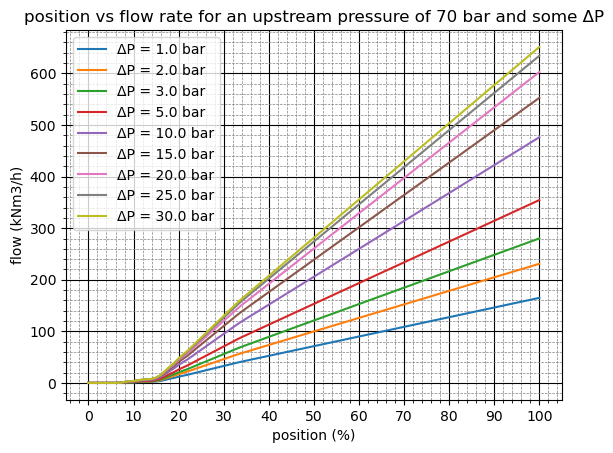

In [19]:
position_l = list(range(0, 101))
for dp in [1.0, 2.0, 3.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0]:
    q_l = []
    for p in position_l:
        q_l.append(valve_flow(cv=vl_pos2cv(p), p1_bara=70.0, p2_bara=70.0-dp)/1_000)
    plt.plot(position_l, q_l, label=f'ΔP = {dp} bar')
plt.title('position vs flow rate for an upstream pressure of 70 bar and some ΔP')
plt.xlabel('position (%)')
plt.ylabel('flow (kNm3/h)')
plt.minorticks_on()
plt.grid(which='major', color='black', linestyle='-', linewidth=0.8)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)
plt.xticks(range(0, 101, 10))
plt.legend()
plt.show()

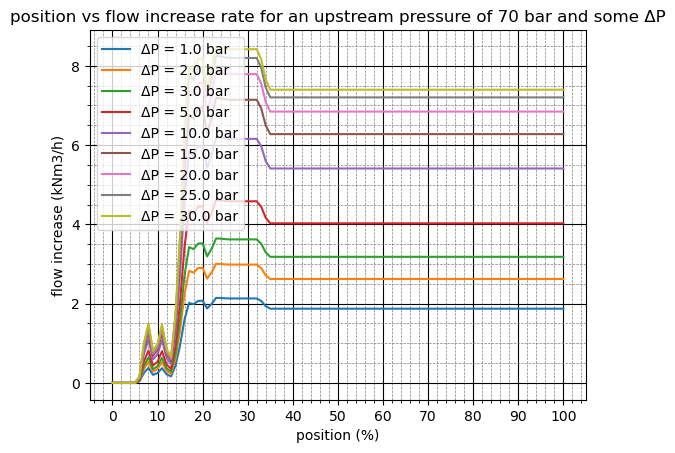

In [20]:
position_l = list(range(0, 101))
for dp in [1.0, 2.0, 3.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0]:
    q_l = []
    for p in position_l:
        q_l.append(valve_flow(cv=vl_pos2cv(p), p1_bara=70.0, p2_bara=70.0-dp)/1_000)
    plt.plot(position_l, np.gradient(q_l), label=f'ΔP = {dp} bar')
plt.title('position vs flow increase rate for an upstream pressure of 70 bar and some ΔP')
plt.xlabel('position (%)')
plt.ylabel('flow increase (kNm3/h)')
plt.minorticks_on()
plt.grid(which='major', color='black', linestyle='-', linewidth=0.8)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)
plt.xticks(range(0, 101, 10))
plt.legend()
plt.show()

# position vs flow rate for some upstream pressures and a ΔP of 15 bar

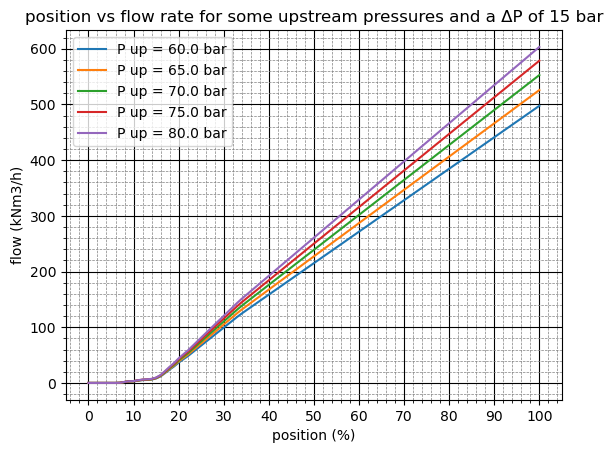

In [21]:
position_l = list(range(0, 101))
for p_up in [60.0, 65.0, 70.0, 75.0, 80.0]:
    q_l = []
    for p in position_l:
        q_l.append(valve_flow(cv=vl_pos2cv(p), p1_bara=p_up, p2_bara=p_up-15.0)/1_000)
    plt.plot(position_l, q_l, label=f'P up = {p_up} bar')
plt.title('position vs flow rate for some upstream pressures and a ΔP of 15 bar')
plt.xlabel('position (%)')
plt.ylabel('flow (kNm3/h)')
plt.minorticks_on()
plt.grid(which='major', color='black', linestyle='-', linewidth=0.8)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5)
plt.xticks(range(0, 101, 10))
plt.legend()
plt.show()

# adaptive kp based on pressure delta

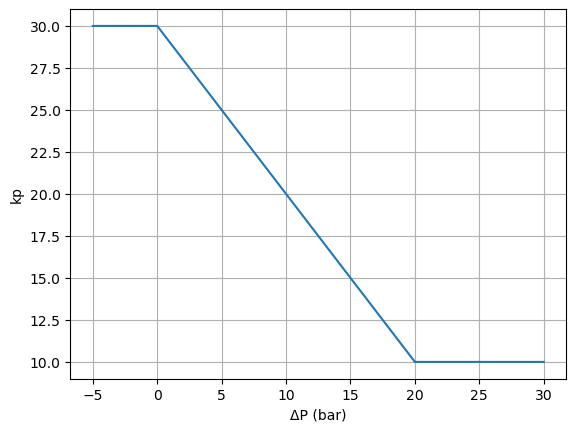

In [22]:
delta_p = np.linspace(-5.0, 30.0, 1_000)
kp = 30.0 - 1.0 * delta_p
kp = np.minimum(kp, 30.0)
kp = np.maximum(kp, 10.0)


plt.plot(delta_p, kp)
plt.xlabel('ΔP (bar)')
plt.ylabel('kp')
plt.grid()